In [1]:
%matplotlib inline
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./data/charity_data.csv")
application_df = application_df.drop(columns=['EIN','NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [3]:
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [4]:
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [5]:
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [6]:
application_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [7]:
application_df.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [8]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [9]:
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [10]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

|Column|Cutoff|
|------|------|
|APPLICATION_TYPE|500|
|AFFILIATION|15000|
|CLASSIFICATION|1000|
|USE_CASE|No Change|
|ORGANIZATION|10000|
|STATUS|no Change|
|INCOME_AMT|500|
|SPECIAL_CONSIDERATIONS|No Change|
|ASK_AMT|Linear|
|IS_SUCCESSFUL|target|

In [11]:
def column_buckets(data, column, cutoff):
    data.copy()
    
    label_list = data[column].value_counts()

    replace_list = list(label_list[label_list < cutoff].index)

    for item in replace_list:
        data[column] = data[column].replace(item,'other')
    
    return data

In [12]:
application_df = column_buckets(application_df, 'APPLICATION_TYPE', 500)
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
application_df = column_buckets(application_df, 'AFFILIATION', 15000)
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
other                 114
Name: AFFILIATION, dtype: int64

In [14]:
application_df = column_buckets(application_df, 'CLASSIFICATION', 1000)
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
application_df = column_buckets(application_df, 'ORGANIZATION', 1000)
application_df.ORGANIZATION.value_counts()

Trust          23515
Association    10255
other            529
Name: ORGANIZATION, dtype: int64

In [16]:
application_df = column_buckets(application_df, 'INCOME_AMT', 500)
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [17]:
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  3
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 3
STATUS                       2
INCOME_AMT                   7
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [18]:
def get_encoded_columns(data):
    data = data.copy()

    encoded_columns = data.dtypes[data.dtypes == 'object'].index.tolist()

    return encoded_columns

In [19]:
application_cat = get_encoded_columns(application_df)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [20]:
def encode_data(data, encoded_columns):
    data = data.copy()

    # make df of columns to be encoded
    enc_df = data[encoded_columns]

    #initialize the encoder
    enc = OneHotEncoder(sparse=False)
    #fit and transform the encoded columns
    encoded = enc.fit_transform(enc_df)

    encoded_df = pd.DataFrame(encoded)
    encoded_df.columns = enc.get_feature_names_out(encoded_columns)

    data = data.merge(encoded_df, left_index=True, right_index=True).drop(columns=encoded_columns, axis=1)

    return data

In [21]:
application_df = encode_data(application_df, application_cat)
application_df

c:\Users\jsrit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_other,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_other',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Trust', 'ORGANIZATION_other',
       'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_other',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [23]:
# split data
def split_target_data(data, target):
    data = data.copy()

    y = data[target].ravel()

    X = data.copy()
    X = X.drop(columns=target)

    return X, y

In [24]:
X, y = split_target_data(application_df, 'IS_SUCCESSFUL')

In [25]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [26]:
#standardize data
def scale_data(train, test):
    scl = StandardScaler()
    xscl = scl.fit(train)
    train_scaled = xscl.transform(train)
    test_scaled = xscl.transform(test)

    return train_scaled, test_scaled

In [27]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [28]:
# make nn model
def make_nn_model(data, n1, n2, act1, act2):
    input_features = len(data[0])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=n1, input_dim=input_features, activation=act1))
    model.add(tf.keras.layers.Dense(units=n2, activation=act2))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.summary()

    return model

In [29]:
nn_model = make_nn_model(data=X_train_scaled, n1=12, n2=10, act1='relu', act2='relu')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                456       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 597
Trainable params: 597
Non-trainable params: 0
_________________________________________________________________


In [30]:
def train_nn_model(model, X_train, y_train, epochs):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    fit_model = model.fit(X_train, y_train, epochs=epochs)

    return fit_model

In [31]:
fit_model = train_nn_model(model=nn_model, X_train=X_train_scaled, y_train=y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 830us/step - loss: 0.5930 - accuracy: 0.7058
Epoch 2/100
804/804 [==============================] - 1s 969us/step - loss: 0.5615 - accuracy: 0.7240
Epoch 3/100
804/804 [==============================] - 1s 880us/step - loss: 0.5556 - accuracy: 0.7291
Epoch 4/100
804/804 [==============================] - 1s 801us/step - loss: 0.5527 - accuracy: 0.7315
Epoch 5/100
804/804 [==============================] - 1s 840us/step - loss: 0.5512 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 1s 768us/step - loss: 0.5493 - accuracy: 0.7306
Epoch 8/100
804/804 [==============================] - 1s 791us/step - loss: 0.5487 - accuracy: 0.7318
Epoch 9/100
804/804 [==============================] - 1s 796us/step - loss: 0.5482 - accuracy: 0.7319
Epoch 10/100
804/804 [==============================] - 1s 793us/step - los

In [32]:
def evaluate_nn_model(model, X_test, y_test):
    model_loss, model_accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {model_loss} | Accuracy: {model_accuracy}')    

In [33]:
evaluate_nn_model(model=nn_model, X_test=X_test_scaled, y_test=y_test)

268/268 [==============================] - 0s 801us/step - loss: 0.5564 - accuracy: 0.7258
Loss: 0.5563994646072388 | Accuracy: 0.7258309125900269


In [39]:
def get_loss_accuracy(model):
    index_range = range(1, len(model.history['loss'])+1)

    la_df = pd.DataFrame(model.history, index=index_range)

    plt.subplots()
    plt.plot(la_df, label=['loss','accuracy'])
    plt.title(f'loss/accuracy - {len(index_range)} epochs')
    plt.legend()
    plt.show()
    
    return la_df

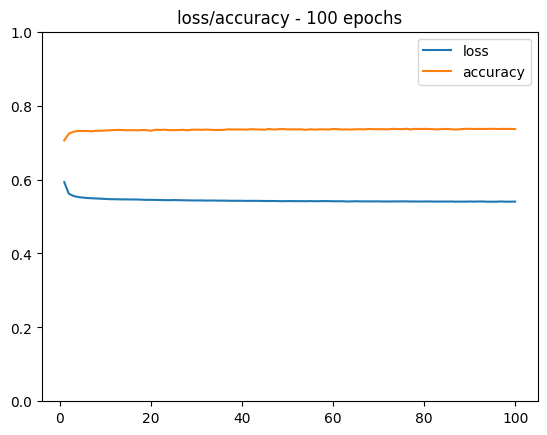

In [40]:
nn_accuracy_df = get_loss_accuracy(fit_model)

In [43]:
# need to reprocess the dataset and repeat the steps above, going to try removing status and special_considerations
# no need to redo the encoding process here 
application_df_reduced = application_df.copy()
application_df_reduced = application_df_reduced.drop(columns=['STATUS','SPECIAL_CONSIDERATIONS_N','SPECIAL_CONSIDERATIONS_Y'], axis=1)

In [45]:
# call split_target_data to split reduced dataset into X and y 
X_reduced, y_reduced = split_target_data(application_df_reduced, 'IS_SUCCESSFUL')

In [46]:
#train test split X and y reduced 
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, random_state=1, stratify=y_reduced)

In [48]:
# scale X train and test reduced
X_train_reduced, X_test_reduced = scale_data(X_train_reduced, X_test_reduced)

In [50]:
nn_model_reduced = make_nn_model(data=X_train_reduced, n1=12, n2=10, act1='relu', act2='relu')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                420       
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [51]:
fit_model_reduced = train_nn_model(nn_model_reduced, X_train=X_train_reduced, y_train=y_train_reduced, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 980us/step - loss: 0.5955 - accuracy: 0.6983
Epoch 2/100
804/804 [==============================] - 1s 969us/step - loss: 0.5620 - accuracy: 0.7275
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5580 - accuracy: 0.7283
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7292
Epoch 5/100
804/804 [==============================] - 1s 939us/step - loss: 0.5538 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7306
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7297
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7315
Epoch 9/100
804/804 [==============================] - 1s 796us/step - loss: 0.5500 - accuracy: 0.7292
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 

In [52]:
evaluate_nn_model(model=nn_model_reduced, X_test=X_test_reduced, y_test=y_test_reduced)

268/268 [==============================] - 0s 851us/step - loss: 0.5551 - accuracy: 0.7248
Loss: 0.5551272034645081 | Accuracy: 0.724781334400177


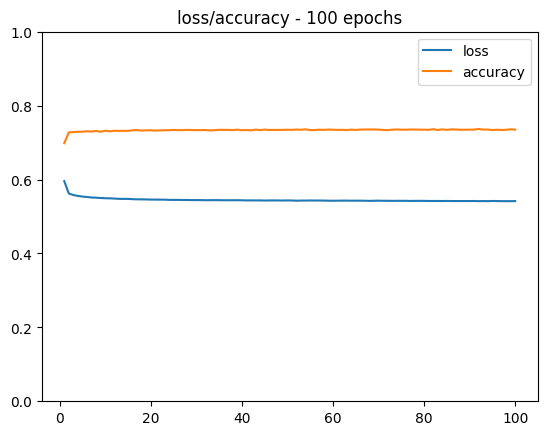

In [53]:
nn_reduced_accuracy_df = get_loss_accuracy(fit_model_reduced)

In [64]:
# lets try with a different activation function
nn_model_tanh = make_nn_model(data=X_train_reduced, n1=12, n2=10, act1='relu', act2='tanh')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 12)                420       
                                                                 
 dense_22 (Dense)            (None, 10)                130       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [66]:
fit_model_tanh = train_nn_model(nn_model_tanh, X_train=X_train_reduced, y_train=y_train_reduced, epochs=300)

Epoch 1/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7338
Epoch 2/300
804/804 [==============================] - 1s 960us/step - loss: 0.5449 - accuracy: 0.7336
Epoch 3/300
804/804 [==============================] - 1s 925us/step - loss: 0.5449 - accuracy: 0.7349
Epoch 4/300
804/804 [==============================] - 1s 928us/step - loss: 0.5447 - accuracy: 0.7338
Epoch 5/300
804/804 [==============================] - 1s 987us/step - loss: 0.5445 - accuracy: 0.7338
Epoch 6/300
804/804 [==============================] - 1s 907us/step - loss: 0.5442 - accuracy: 0.7338
Epoch 7/300
804/804 [==============================] - 1s 919us/step - loss: 0.5441 - accuracy: 0.7341
Epoch 8/300
804/804 [==============================] - 1s 926us/step - loss: 0.5439 - accuracy: 0.7320
Epoch 9/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5438 - accuracy: 0.7334
Epoch 10/300
804/804 [==============================] - 1s 976us/step - loss:

In [67]:
evaluate_nn_model(model=nn_model_tanh, X_test=X_test_reduced, y_test=y_test_reduced)

268/268 [==============================] - 0s 940us/step - loss: 0.5560 - accuracy: 0.7305
Loss: 0.5559631586074829 | Accuracy: 0.7304956316947937


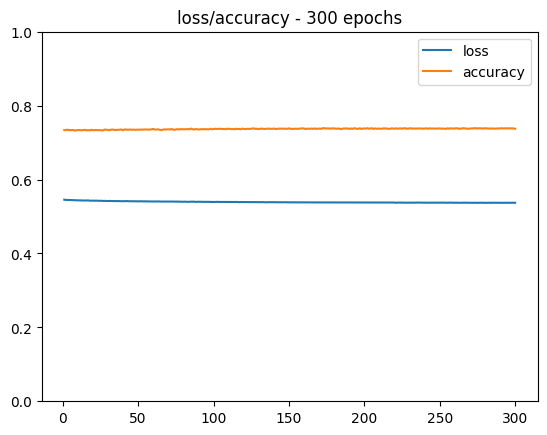

In [68]:
nn_tanh_accuracy_df = get_loss_accuracy(fit_model_tanh)

In [70]:
# not good enough ... lets get rid of the columns that only less than 5 categories ['organization and affiliation]

organization_columns = [col for col in application_df_reduced.columns if 'ORGANIZATION' in col]
affiliation_columns = [col for col in application_df_reduced.columns if 'AFFILIATION' in col]
drop_columns = organization_columns + affiliation_columns

In [ ]:
application_df_reduced = application_df_reduced.drop(columns=)